In [20]:
# Obtenemos el directorio y los archivos donde se encuentra la información
import os

cwd   = os.getcwd()
files = os.listdir(cwd+'/ramanspectra')

# Iteramos sobre los archivos para ordenar los datos
# Añadiendo cwd y la carpeta de trabajjo
files = [cwd+'/ramanspectra/'+f for f in files]

# Creando el arreglo de contenidos
conts = []
for file in files:
    with open(file, 'r', encoding = 'unicode_escape') as tempfile:
        conts.append(tempfile.read())


In [22]:
values = conts[0].split('#Acquired')[1].split('\n')[1:-1]
spx=[]
spy=[]
for string_values in values:
    x = float(string_values.split('\t')[0])
    y = float(string_values.split('\t')[1])
    spx.append(x)
    spy.append(y)

In [23]:
spx

[51.154,
 52.9997,
 54.8428,
 56.6878,
 58.5302,
 60.3744,
 62.2161,
 64.0596,
 65.9006,
 67.7434,
 69.5836,
 71.4257,
 73.2652,
 75.1065,
 76.9454,
 78.786,
 80.624,
 82.4639,
 84.3013,
 86.1404,
 87.9771,
 89.8134,
 91.6514,
 93.487,
 95.3243,
 97.1592,
 98.9958,
 100.83,
 102.664,
 104.499,
 106.332,
 108.165,
 109.999,
 111.831,
 113.663,
 115.496,
 117.327,
 119.158,
 120.99,
 122.82,
 124.649,
 126.481,
 128.309,
 130.138,
 131.968,
 133.796,
 135.623,
 137.45,
 139.278,
 141.105,
 142.931,
 144.756,
 146.583,
 148.408,
 150.233,
 152.057,
 153.883,
 155.706,
 157.529,
 159.352,
 161.174,
 162.996,
 164.82,
 166.641,
 168.462,
 170.282,
 172.102,
 173.922,
 175.742,
 177.563,
 179.382,
 181.2,
 183.018,
 184.836,
 186.653,
 188.47,
 190.287,
 192.103,
 193.919,
 195.734,
 197.552,
 199.366,
 201.181,
 202.995,
 204.809,
 206.622,
 208.435,
 210.248,
 212.06,
 213.872,
 215.684,
 217.495,
 219.306,
 221.117,
 222.927,
 224.737,
 226.544,
 228.354,
 230.162,
 231.971,
 233.779,
 23

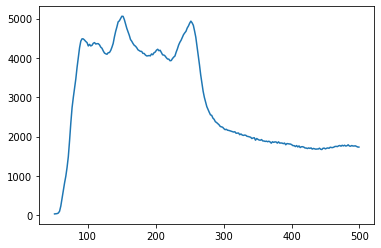

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi


plt.plot(spx,spy)